# Limpeza e Preparação dos Dados 🏗️ 🎲

## Sumário da Aula

<ul>
    <ul>
    <li>Reorganização 🗂️</li>
    <li>Limpeza 🧹</li>
    <li>Transformação 🛠️</li>
</ul>

## Aspectos de Reorganização, Limpeza e Transformação dos Dados

<ul>
    <li>80% do tempo do analista de dados é investido em carga; reorganização; limpeza; e transformação.
    <li>A maneira em que os dados estão armazenados em arquivos ou bancos de dados podem não corresponder ao formato apropriado para determinada tarefa;</li>
    <li>É comum o uso de linguagens de programação para transformar os dados de um formato para outro.</li>
        </ul>
    </li>
</ul>

### Biblioteca Principal 📚: pandas

<img src="https://pandas.pydata.org/docs/_static/pandas.svg" width="100" style="float: right;">

In [1]:
import pandas as pd

### Reorganização 🗂️ dos Dados 🎲

#### Filtro 🍝 em Series 🎞️

<pre>Você pode <b>filtrar</b> os elementos de uma Serie de várias formas

In [2]:
pibpc = pd.Series(data=[6797, 63123, 8476, 43258], 
                  index=['Brasil', 'EUA', 'Argentina', 'Canada'])
pibpc

Brasil        6797
EUA          63123
Argentina     8476
Canada       43258
dtype: int64

In [3]:
pibpc['EUA']

63123

In [4]:
pibpc[1]

/var/folders/3k/5x2j3hkx6x3f717k3344mgpm0000gn/T/ipykernel_10148/2533242086.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pibpc[1]


63123

In [5]:
pibpc[2:4]

Argentina     8476
Canada       43258
dtype: int64

In [6]:
pibpc[['EUA', 'Brasil', 'Canada']]

EUA       63123
Brasil     6797
Canada    43258
dtype: int64

In [7]:
pibpc[[1, 3]]

/var/folders/3k/5x2j3hkx6x3f717k3344mgpm0000gn/T/ipykernel_10148/3175604461.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pibpc[[1, 3]]


EUA       63123
Canada    43258
dtype: int64

In [8]:
pibpc[pibpc < 10_000]

Brasil       6797
Argentina    8476
dtype: int64

👉 dica: dependendo do tipo de dados do índice da Series, utilizar inteiro entre colchetes <b>[ ]</b> pode ser confuso. <br />O inteiro se refere ao valor do índice ou à posição da sequência no índice? Na dúvida, tenha preferência por usar as funções:
    <ul>
        <li><b>loc</b>: usa o valor do índice como elemento de filtro; e</li>
        <li><b>iloc</b>: usa a posição da sequência no índice como elemento de filtro.</li>
    </ul>

In [9]:
pibpc.loc[['Brasil', 'EUA']]

Brasil     6797
EUA       63123
dtype: int64

In [10]:
pibpc.iloc[[0, 1]]

Brasil     6797
EUA       63123
dtype: int64

#### Seleção 🍕 e Filtro 🍝 em DataFrame 📽️

In [11]:
# Vamos analisar alguns dados de orgãos superiores do governo (em 2022)
# https://portaldatransparencia.gov.br/orgaos-superiores?ano=2022

ministerios = ['Educacao', 'Saude', 'Fazenda', 'Agricultura']
servidores = [374_209, 44_762, 50_820, 15_275]
folha_pagamento = [29_905, 4_015, 3_002, 2_741] # em R$ 1.000.000
valor_arrecadado = [34_622, 2_430, 3_434_537, 6_128] # em R$ 1.000.000
despesa = [139_593, 143_251, 2_308_118, 13_663] # em R$ 1.000.000

In [12]:
df = pd.DataFrame({
    'Servidores': servidores,
    'Folha de Pagamento': folha_pagamento,
    'Valor Arrecadado': valor_arrecadado,
    'Despesa': despesa
}, index = ministerios)

df

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,374209,29905,34622,139593
Saude,44762,4015,2430,143251
Fazenda,50820,3002,3434537,2308118
Agricultura,15275,2741,6128,13663


<pre> Você pode <b>selecionar</b> uma coluna de um DataFrame pelo nome da coluna -- e retornar Serie</pre>

In [13]:
df['Folha de Pagamento']

Educacao       29905
Saude           4015
Fazenda         3002
Agricultura     2741
Name: Folha de Pagamento, dtype: int64

<pre>Você pode <b>selecionar</b> colunas de um DataFrame pela lista dos nomes das colunas -- e retornar DataFrame</pre>

In [14]:
df[['Valor Arrecadado', 'Servidores']]

,Valor Arrecadado,Servidores
Educacao,34622,374209
Saude,2430,44762
Fazenda,3434537,50820
Agricultura,6128,15275


<pre>Você pode <b>filtrar</b> linhas de um DataFrame com slicing -- e retornar DataFrame</pre>

In [15]:
df[:2]

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,374209,29905,34622,139593
Saude,44762,4015,2430,143251


<pre>Você pode combinar <b>seleção</b> e <b>filtro</b> de um DataFrame com <i>boolean indexing</i> -- e retornar DataFrame</pre>

In [16]:
df[df['Servidores'] > 50000]

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,374209,29905,34622,139593
Fazenda,50820,3002,3434537,2308118


<pre>🍒 🎂 Você pode inclusive atribuir um valor às células <b>filtradas</b> pela operação imediatamente acima</pre>

In [17]:
df[df['Servidores'] > 50000] = 0
df

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,0,0,0,0
Saude,44762,4015,2430,143251
Fazenda,0,0,0,0
Agricultura,15275,2741,6128,13663


👉 dica: dependendo do tipo de dados do índice do DataFrame, utilizar inteiro entre colchetes <b>[ ]</b> pode ser confuso. <br />O inteiro se refere ao valor do índice ou à posição da sequência no índice? na dúvida, tenha preferência por usar as funções:
    <ul>
        <li><b>loc</b>: usa o valor do índice como elemento de filtro; e</li>
        <li><b>iloc</b>: usa a posição da sequência no índice como elemento de filtro.</li>
    </ul>

<pre>Com loc, você pode ... </pre>

<pre>... <b>filtrar</b> uma linha de um DataFrame pelo nome da linha -- e retornar Serie...</pre>

In [18]:
df.loc['Saude']

Servidores             44762
Folha de Pagamento      4015
Valor Arrecadado        2430
Despesa               143251
Name: Saude, dtype: int64

<pre>... <b>filtrar</b> linhas de um DataFrame pela lista dos nomes das linhas -- e retornar DataFrame...</pre>

In [19]:
df.loc[["Saude", "Agricultura"]]

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Saude,44762,4015,2430,143251
Agricultura,15275,2741,6128,13663


<pre>... combinar <b>seleção</b> e <b>filtro</b> de um DataFrame -- com vírgula separando linhas de colunas...</pre>

In [20]:
df.loc["Saude", ["Folha de Pagamento", "Valor Arrecadado"]]

Folha de Pagamento    4015
Valor Arrecadado      2430
Name: Saude, dtype: int64

<pre>Igualmente, com <i>iloc</i>, você pode repetir a sequência de operações imediatamente acima</pre>

In [21]:
df.iloc[1]

Servidores             44762
Folha de Pagamento      4015
Valor Arrecadado        2430
Despesa               143251
Name: Saude, dtype: int64

In [22]:
df.iloc[[1, 3]]

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Saude,44762,4015,2430,143251
Agricultura,15275,2741,6128,13663


In [23]:
df.iloc[3, [3, 0, 1]]

Despesa               13663
Servidores            15275
Folha de Pagamento     2741
Name: Agricultura, dtype: int64

In [24]:
df.iloc[[1, 2], [3, 0, 1]]

,Despesa,Servidores,Folha de Pagamento
Saude,143251,44762,4015
Fazenda,0,0,0


##### Quadro-resumo dos métodos de Seleção 🍕 e Filtro 🍝 em DataFrame 📽️

<table>
    <tr><th>Opção</th><th>Descrição</th></tr>
    <tr><td>df[column]</td><td>Selecione uma única coluna ou sequência de colunas do DataFrame; <br />Os casos especiais: <ol><li>Vetor booleano: filtra linhas;</li><li>Slice: fatia linhas; e</li><li>DataFrame booleano: atribui valores com base em critérios.</li></ol></td></tr>
    <tr><td>df.loc[rows]</td><td>Selecione uma única linha ou subconjunto de linhas do DataFrame pelos rótulos do índices</td></tr>
    <tr><td>df.loc[:, cols]</td><td>Selecione uma única coluna ou subconjunto de colunas pelos rótulo dos índices</td></tr>
    <tr><td>df.loc[rows, cols]</td><td>Selecione linha(s) e coluna(s) pelos rótulos do índices</td></tr>
    <tr><td>df.iloc[rows]</td><td>Selecione uma única linha ou subconjunto de linhas do DataFrame pela posição na sequência do índice</td></tr>
    <tr><td>df.iloc[:, cols]</td><td>Selecione uma única coluna ou subconjunto de colunas pela posições nas sequências dos índices</td></tr>
    <tr><td>df.iloc[rows, cols]</td><td>Selecione tanto linha(s) quanto coluna(s) pela posições nas sequências dos índices</td></tr>
    <tr><td>df.at[row, col]</td><td>Selecione um único valor escalar pelos rótulos do índices</td></tr>
    <tr><td>df.iat[row, col]</td><td>Selecione um único valor escalar pela posições nas sequências dos índices</td></tr>
    <tr><td>reindex method</td><td>Selecione linhas ou colunas pelos rótulos do índices</td></tr>
</table>

### Limpeza 🧹 dos Dados 🎲

<img src="https://pbs.twimg.com/media/EJZlTJ5W4AAeKtU?format=jpg" width="800px" style="margin-left: auto; margin-right: auto;">

<pre>Veremos, a seguir, operações que serão utilizadas para contemplar os itens da lista de verificação de limpeza de dados 👆.</pre>

#### Dados Ausentes

Dados ausentes são comuns em muitas análises de dados; o pandas tem como objetivo trabalhar com dados ausentes com a menor "dor" possível.

Algumas das razões em termos dados ausentes:
<ul>
    <li>Falta da informação (Ex: países que não tem cultura de dados abertos)</li>
    <li>Erro de programação 🧑🏻‍💻</li>
    <li>Entrada de dados incorreta ❌</li>
    <li>Eventos arbitrários (feriados/problemas climáticos) 🎲</li>
</ul>

Nem sempre sua base de dados te indicará os dados ausentes. As vezes você terá que encontrá-los. Geralmente, estão representados da seguinte forma:

<ul>
    <li>NaN</li>
    <li>999</li>
    <li>.</li>
    <li>..</li>
    <li>?</li>
    <li>faltante</li>
    <li>" "</li>
</ul>

O que devemos fazer com os Dados Ausentes?

<ul>
    <li>Substituir manualmente por valores significativos (NaN?);</li>
    <li>Filtrar/excluir a variável (coluna) ou a ocorrência (linha); ou</li>
    <li>Preencher/imputar valores (média, mediana, etc).</li>
</ul>

🚨 Tenha em mente que imputar valores é uma aproximação. Isso pode gerar viés para seu modelo.

In [25]:
import numpy as np

<pre>Você pode representar o valor ausente para ponto flutuante com <i>np.nan</i>...</pre>

In [26]:
servidores[1] = np.nan
servidores_s = pd.Series(servidores)
servidores_s

0    374209.0
1         NaN
2     50820.0
3     15275.0
dtype: float64

<pre>Veja que você pode identificar os valores não disponíveis (<i>NA = Not Available</i>), incluso o NaN (<i>Not a Number</i>)</pre>

In [27]:
servidores_s.isna()

0    False
1     True
2    False
3    False
dtype: bool

<pre>ou com o próprio valor <i>None</i> do Python.</pre>

In [28]:
ministerios[1] = None
ministerios_s = pd.Series(ministerios)
ministerios_s

0       Educacao
1           None
2        Fazenda
3    Agricultura
dtype: object

In [29]:
ministerios_s.isna()

0    False
1     True
2    False
3    False
dtype: bool

<pre> Você pode precisar transformar algum valor (no caso "..") em NaN.</pre>


In [30]:
ministerios_s[2] = '..'
ministerios_s.replace('..', np.nan, inplace=True)
ministerios_s

0       Educacao
1           None
2            NaN
3    Agricultura
dtype: object

👉 dica: na ausência de <i>np.nan</i>, o <i>None</i> é automaticamente convertido para NaN

In [31]:
servidores[1] = None
servidores

[374209, None, 50820, 15275]

In [32]:
servidores_s = pd.Series(servidores)
servidores_s

0    374209.0
1         NaN
2     50820.0
3     15275.0
dtype: float64

In [33]:
ministerios_s.isna()

0    False
1     True
2     True
3    False
dtype: bool

##### Filtrando Dados Ausentes

<pre>... com Series 🎞️</pre>

In [34]:
servidores_s

0    374209.0
1         NaN
2     50820.0
3     15275.0
dtype: float64

In [35]:
#equivalentemente, servidores_s[servidores_s.notna()]
servidores_s.dropna()

0    374209.0
2     50820.0
3     15275.0
dtype: float64

<pre>... com DataFrame 📽️...</pre>

In [36]:
# Retomando o dataframe de dados dos orgãos superiores
# https://portaldatransparencia.gov.br/orgaos-superiores?ano=2022

df

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,0,0,0,0
Saude,44762,4015,2430,143251
Fazenda,0,0,0,0
Agricultura,15275,2741,6128,13663


In [37]:
# Vamos inserir alguns NaN
df.iloc[2,:] = df.iloc[3,0] = df.iloc[0,1] = df.iloc[0,2] = np.nan
df

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,0.0,NaN,NaN,0.0
Saude,44762.0,4015.0,2430.0,143251.0
Fazenda,NaN,NaN,NaN,NaN
Agricultura,NaN,2741.0,6128.0,13663.0


<pre>... você pode excluir as linhas que tenham ao menos um valor ausente...</pre>

In [38]:
df.dropna(how='any')

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Saude,44762.0,4015.0,2430.0,143251.0


<pre>... as linhas que tenham todos os valores ausentes...</pre>

In [39]:
df.dropna(how="all")

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,0.0,NaN,NaN,0.0
Saude,44762.0,4015.0,2430.0,143251.0
Agricultura,NaN,2741.0,6128.0,13663.0


<pre>... ou qualquer número de ocorrências entre os extremos.</pre>

In [40]:
df.dropna(thresh=3) #thresh = número mínimo de valores não ausentes

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Saude,44762.0,4015.0,2430.0,143251.0
Agricultura,NaN,2741.0,6128.0,13663.0


###### Quadro-resumo dos métodos para tratamento de <i>NA</i>

<table>
    <tr><th>Argumento</th><th>Descrição</th></tr>
    <tr><td>dropna</td><td>Filtra rótulos de eixos, baseado no fato de os valores para cada rótulo terem dados ausentes, com limites variados para a quantidade de dados ausentes a ser tolerada.</td></tr>
    <tr><td>fillna</td><td>Preenche os dados ausentes com algum valor ou utilizando um método de interpolação como 'ffill' ou 'bfill'.</td></tr>
    <tr><td>isnull</td><td>Devolve valores booleanos informando quais valores estão ausentes/são NA.</td></tr>
    <tr><td>notnull</td><td>Negação de isnull.</td></tr>
</table>

##### Preenchendo Dados Ausentes

<pre>Veja que filtrar os dados ausentes pode incorrer em descartar outros dados (não-ausentes)</pre>
<pre>Portanto, alternativamente ao descarte, você pode preencher as lacunas (de dados ausentes) de várias maneiras:</pre>

<pre>por uma constante;</pre>

In [41]:
df.fillna(0)

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,0.0,0.0,0.0,0.0
Saude,44762.0,4015.0,2430.0,143251.0
Fazenda,0.0,0.0,0.0,0.0
Agricultura,0.0,2741.0,6128.0,13663.0


<pre>por uma constante, de acordo com a coluna;</pre>

In [42]:
df.fillna({'Servidores': 10_000, 'Folha de Pagamento': 3_000})

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,0.0,3000.0,NaN,0.0
Saude,44762.0,4015.0,2430.0,143251.0
Fazenda,10000.0,3000.0,NaN,NaN
Agricultura,10000.0,2741.0,6128.0,13663.0


<pre>por interpolação; </pre>

In [43]:
df.fillna(method="ffill")

/var/folders/3k/5x2j3hkx6x3f717k3344mgpm0000gn/T/ipykernel_10148/2686095795.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,0.0,NaN,NaN,0.0
Saude,44762.0,4015.0,2430.0,143251.0
Fazenda,44762.0,4015.0,2430.0,143251.0
Agricultura,44762.0,2741.0,6128.0,13663.0


<pre>ou imputando dado por alguma medida de centralidade estatística, <i>e.g.</i> média.</pre>

In [44]:
df.fillna(df.mean())

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,0.0,3378.0,4279.0,0.000000
Saude,44762.0,4015.0,2430.0,143251.000000
Fazenda,22381.0,3378.0,4279.0,52304.666667
Agricultura,22381.0,2741.0,6128.0,13663.000000


##### Quadro-resumo dos argumentos da função <i>fillna</i>

<table>
    <tr><th>Argumento</th><th>Descrição</th></tr>
    <tr><td>value</td><td>Valor escalar ou um objeto do tipo dicionário a ser usado para preencher valores ausentes</td></tr>
    <tr><td>method</td><td>Interpolação; por padrão, será 'ffill' se a função for chamada sem outros argumentos</td></tr>
    <tr><td>axis</td><td>Eixo a ser preenchido; o default é axis=0</td></tr>
    <tr><td>inplace</td><td>Modifica o objeto que faz a chamada, sem gerar uma cópia</td></tr>
    <tr><td>limit</td><td>Para preenchimento para a frente (forward) e para trás (backward), é o número máximo de valores consecutivos a serem preenchidos</td></tr>
</table>

#### Eliminando Dados Duplicados

<pre>Alguns dados podem estar duplicados.</pre>

In [45]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], 
                     "k2": [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


<pre>Você pode identificar os valores duplicados (considerando toda a linha)...</pre>

In [43]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

<pre>... e descartar as linhas repetidas...<//pre>

In [44]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


<pre>... ou descartar as linhas repetidas considerando parte das colunas.</pre>

👉 dica: o parâmetro <i>keep</i> pode ser usado para decidir qual ocorrência de linha duplicada será mantida

In [45]:
data.drop_duplicates(subset=["k1"], keep='first') #tente keep='last'

,k1,k2
0,one,1
1,two,1


## Outliers

<pre>Outliers (valores discrepantes) são dados que se desviam do restante dos dados.</pre>

Outliers podem ser decorrentes de:


   <ul>
    <ul>
    <li>❌ Erros de entrada de dados ou de medida</li>
    <li>🆕 Dados fora da curva (Ex: salário do jogador de futebol)
 </li>
    <li>🧑🏻‍🔬 Manipulação de dados e erros de pré-processamento </li>
   </ul>

👉 importante: outliers podem afetar a distribuição do conjunto de dados, afetar medidas de dispersão e prejudicar a análise de dados

### Detectando Outliers - Boxplot

<pre>Podemos usar boxplots para visualizar valores discrepantes em um conjunto de dados.</pre>

In [46]:
# Retomando o dataframe de dados dos orgãos superiores
# https://portaldatransparencia.gov.br/orgaos-superiores?ano=2022

df

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,0.0,NaN,NaN,0.0
Saude,44762.0,4015.0,2430.0,143251.0
Fazenda,NaN,NaN,NaN,NaN
Agricultura,NaN,2741.0,6128.0,13663.0


In [47]:
# Vamos inserir alguns outliers

df.loc['Educacao'] = [374_209, 29_905_000_000, 34_622, 139_593]
df.loc['Fazenda'] = [50_820, 3_002, 3_434_537, 2_308_118]
df.loc['Agricultura', 'Servidores'] = 15_275
df = df.astype('int64')
df

,Servidores,Folha de Pagamento,Valor Arrecadado,Despesa
Educacao,374209,29905000000,34622,139593
Saude,44762,4015,2430,143251
Fazenda,50820,3002,3434537,2308118
Agricultura,15275,2741,6128,13663


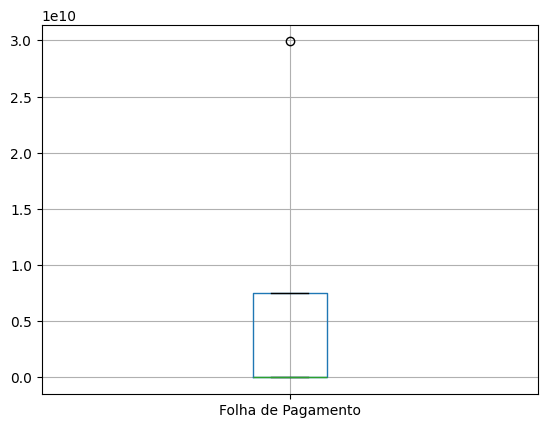

In [48]:
df[['Folha de Pagamento']].boxplot();

In [50]:
df['Folha de Pagamento'].max() 

29905000000

#### Detectando e Filtrando Valores Discrepantes (<i>Outliers</i>)

<pre>Detectar valores discrepantes é uma operação vetorial</pre>

In [51]:
# DataFrame com 4 colunas com valores amostrados
# a partir de uma distribuição normal padrão
normal_data = pd.DataFrame(np.random.standard_normal((1000, 4))) 
normal_data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.014231,0.003458,-0.002064,-0.004140
std,1.011130,1.009943,0.995083,1.018989
min,-3.227733,-2.902130,-4.155693,-3.299451
25%,-0.711934,-0.698663,-0.673368,-0.676823
50%,-0.015396,0.001395,-0.006214,-0.045461
75%,0.671789,0.680058,0.667618,0.696960
max,3.007495,2.908480,2.943735,3.491653


In [53]:
# fato: 99% dos valores de uma 
#    distribuição normal padrão está entre -3 e 3.

# vamos identificar todas as linhas que têm valores
#    fora desse intervalo (e considerá-los nossos outliers)
normal_data[(normal_data.abs() > 3).any(axis="columns")]

,0,1,2,3
30,-3.227733,0.354035,-0.043670,0.055673
114,-3.031185,-1.039535,1.336338,-1.070168
122,-0.949251,-1.042370,-0.807583,3.491653
140,-0.701577,-0.177537,1.654535,-3.132084
223,0.591401,1.038632,-3.089560,0.365002
291,-3.045477,0.328600,0.963027,1.070331
495,-1.039046,1.169561,1.749309,-3.218256
536,-0.016321,0.972970,-0.082395,-3.299451
647,-1.757834,-1.626881,-4.155693,-0.878936
663,-1.014018,-0.675109,-0.417123,3.234995


In [51]:
# para os valores que estão fora do intervalo entre -3 e 3, 
# podemos modificá-los para o valor mais próximo do intervalo
normal_data[normal_data.abs() > 3] = np.sign(normal_data) * 3

In [52]:
normal_data[(normal_data.abs() == 3).any(axis="columns")]

,0,1,2,3
8,3.000000,-1.902412,-1.303853,0.562848
87,-0.186065,-1.315669,-1.416567,3.000000
95,3.000000,-2.538058,1.092340,-1.022015
227,3.000000,1.352343,-1.023091,-0.510337
263,0.711676,0.262585,-1.675502,3.000000
380,0.466709,-0.398783,1.804423,-3.000000
822,0.087511,3.000000,0.579510,-0.816864
899,-0.989561,3.000000,-0.740969,0.176396
924,-0.689304,-0.007101,-3.000000,-1.181661


In [53]:
normal_data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.023851,-0.017970,0.038931,0.041197
std,0.958433,1.004925,0.982774,1.021587
min,-2.471032,-2.954173,-3.000000,-3.000000
25%,-0.593089,-0.712130,-0.600410,-0.653380
50%,0.007526,-0.005422,0.062574,0.029091
75%,0.675762,0.655206,0.704870,0.716440
max,3.000000,3.000000,2.895931,3.000000


### Transformação 🛠️ dos Dados 🎲

<pre>Operações além de reorganização de dados e limpeza, vistos até agora, são importantes operações de preparação.</pre>

#### Transformando Dados com Mapeamento (De/Para)

<pre>Por alguma razão, você pode precisar mapear valores de um vetor, Series ou coluna de um DataFrame</pre>

In [54]:
data['k1']

0    one
1    two
2    one
3    two
4    one
5    two
6    two
Name: k1, dtype: object

<pre>Você pode fazer isso com o uso de um dicionário...</pre>

In [55]:
en_to_pt = {'one': 'um', 'two': 'dois'}
data['k1'].map(en_to_pt)

0      um
1    dois
2      um
3    dois
4      um
5    dois
6    dois
Name: k1, dtype: object

<pre>... ou de uma função.</pre>

In [56]:
data['k1'].map(lambda x: 'um' if x == 'one' else 'dois')

0      um
1    dois
2      um
3    dois
4      um
5    dois
6    dois
Name: k1, dtype: object

In [57]:
data['k1'].map(str.capitalize)

0    One
1    Two
2    One
3    Two
4    One
5    Two
6    Two
Name: k1, dtype: object

#### Substituindo Valores

<pre>Por alguma razão, você pode precisar substituir valores do DataFrame (operação mais ampla que o <i>map</i>)</pre>

<pre>Você pode fazer isso com o uso de um dicionário...</pre>

In [58]:
data.replace(en_to_pt)

,k1,k2
0,um,1
1,dois,1
2,um,2
3,dois,3
4,um,3
5,dois,4
6,dois,4


<pre>... ou de duas listas de valores: uma com valores a serem substituídos e outra com seus respectivos substitutos.</pre>

In [59]:
data.replace(['one', 'two'], ['um', 'dois'])

,k1,k2
0,um,1
1,dois,1
2,um,2
3,dois,3
4,um,3
5,dois,4
6,dois,4


#### Discretizando e Compartimentalizando (<i>Bin</i>)

<pre>Dados contínuos com frequência são discretizados ou, alternativamente, separados em compartimentos</pre>

In [60]:
idades = pd.DataFrame({'idade': [20, 22, 25, 27, 1, 23,
                                 37, 31, 61, 45, 41, 32]})
idades

,idade
0,20
1,22
2,25
3,27
4,21
5,23
6,37
7,31
8,61
9,45


In [61]:
idades['faixa_etaria'] = pd.cut(idades['idade'], [18, 25, 35, 60, 100])
idades

,idade,faixa_etaria
0,20,"(18, 25]"
1,22,"(18, 25]"
2,25,"(18, 25]"
3,27,"(25, 35]"
4,21,"(18, 25]"
5,23,"(18, 25]"
6,37,"(35, 60]"
7,31,"(25, 35]"
8,61,"(60, 100]"
9,45,"(35, 60]"


<font size=7><center><code>Executem todo este caderno...</code></center></font>

<font size=7><center><code>... bem como o caderno Juntando as Peças</code></center></font>